In [136]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

import warnings 
warnings.filterwarnings("ignore")

In [137]:
df = pd.read_csv('resume_based_job_dataset_25000_realistic.csv')
df.head()

,Job_Title,Skills,Education_Level,Preferred_Location,Experience
0,Cybersecurity Analyst,"Nmap, Network Security, Vulnerability Assessme...",M.Sc,Mumbai,10
1,Machine Learning Engineer,"Keras, Deep Learning, PyTorch, Python",MBA,Mumbai,1
2,Database Administrator,"Database Security, Replication, PostgreSQL, Mo...",MCA,Mumbai,2
3,Database Administrator,"Database Security, Monitoring, Replication, Ba...",B.Sc,Bangalore,8
4,Cloud Engineer,"Monitoring, CloudFormation, AWS, Azure, Linux",M.Sc,Delhi,2


In [138]:
df.shape

(25000, 5)

In [139]:
df.isnull().sum()

Job_Title             0
Skills                0
Education_Level       0
Preferred_Location    0
Experience            0
dtype: int64

In [140]:
df.dtypes

Job_Title             object
Skills                object
Education_Level       object
Preferred_Location    object
Experience             int64
dtype: object

In [141]:
df['Job_Title'].value_counts()

Job_Title
Full Stack Developer          1324
QA Engineer                   1295
Data Analyst                  1293
Business Analyst              1290
Database Administrator        1280
DevOps Engineer               1272
Machine Learning Engineer     1266
Product Manager               1249
Technical Support Engineer    1247
Data Scientist                1246
Cybersecurity Analyst         1242
HR Executive                  1240
AI Researcher                 1240
Cloud Engineer                1239
Software Engineer             1237
UI/UX Designer                1225
Frontend Developer            1212
IT Project Manager            1210
System Administrator          1199
Backend Developer             1194
Name: count, dtype: int64

In [142]:
df['Job_Title'].unique()

array(['Cybersecurity Analyst', 'Machine Learning Engineer',
       'Database Administrator', 'Cloud Engineer', 'Backend Developer',
       'DevOps Engineer', 'Technical Support Engineer',
       'Full Stack Developer', 'Data Analyst', 'Product Manager',
       'System Administrator', 'Data Scientist', 'QA Engineer',
       'UI/UX Designer', 'Frontend Developer', 'IT Project Manager',
       'HR Executive', 'AI Researcher', 'Business Analyst',
       'Software Engineer'], dtype=object)

In [143]:
# TF-IDF Vectorization
def custom_tokenizer(x):
    return x.split(', ')
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, max_features=1000)
skills_tfidf = tfidf.fit_transform(df['Skills']).toarray()

In [144]:
edu_encoder = OneHotEncoder(sparse_output=False)
education_encoded = edu_encoder.fit_transform(df[['Education_Level']])

In [145]:
loc_encoder = OneHotEncoder(sparse_output=False)
location_encoded = loc_encoder.fit_transform(df[['Preferred_Location']])

In [146]:
experience = df[['Experience']].values

In [147]:
X = np.hstack((skills_tfidf, education_encoded, location_encoded, experience))

In [148]:
X.shape

(25000, 157)

In [149]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Job_Title'])

In [150]:
y.shape

(25000,)

In [151]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state = 43, stratify=y)

In [152]:
print(X_train.shape[0])
print(X_test.shape[0])

20000
5000


In [153]:
model = RandomForestClassifier(n_estimators = 100, random_state= 43)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [154]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")

print('classification_report :' ,classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print('confusion_matrix :' ,confusion_matrix(y_test, y_pred))


Accuracy: 99.5800%
classification_report :                             precision    recall  f1-score   support

             AI Researcher       1.00      1.00      1.00       248
         Backend Developer       0.98      0.98      0.98       239
          Business Analyst       1.00      1.00      1.00       258
            Cloud Engineer       0.99      0.96      0.98       248
     Cybersecurity Analyst       1.00      1.00      1.00       248
              Data Analyst       1.00      1.00      1.00       259
            Data Scientist       1.00      1.00      1.00       249
    Database Administrator       1.00      1.00      1.00       256
           DevOps Engineer       0.97      0.99      0.98       254
        Frontend Developer       1.00      1.00      1.00       242
      Full Stack Developer       0.98      0.98      0.98       265
              HR Executive       1.00      1.00      1.00       248
        IT Project Manager       1.00      1.00      1.00       242
 Mac

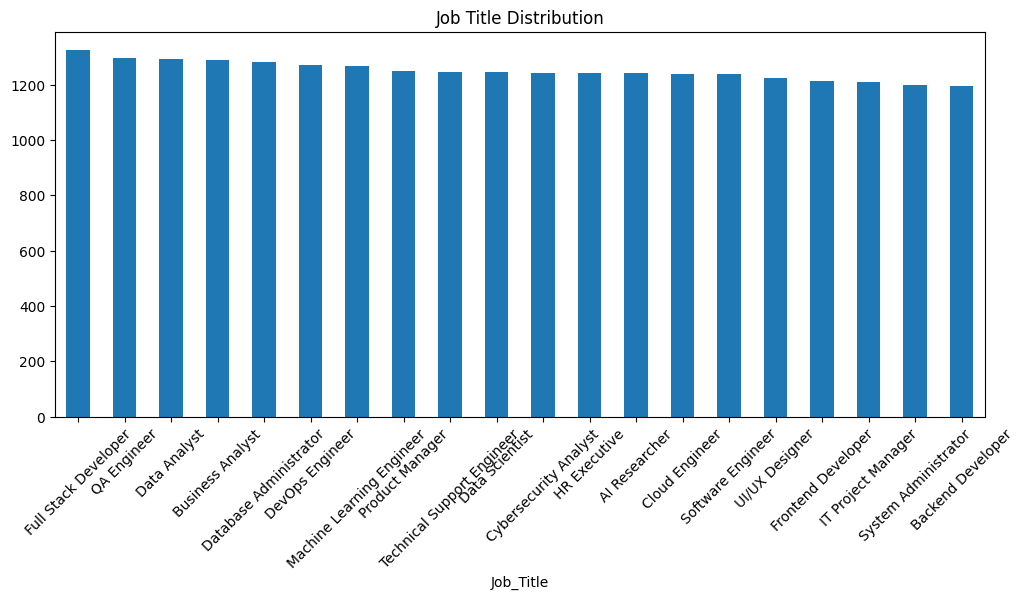

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df['Job_Title'].value_counts().plot(kind='bar')
plt.title("Job Title Distribution")
plt.xticks(rotation=45)
plt.show()


In [156]:
print("TF-IDF shape:", skills_tfidf.shape)


TF-IDF shape: (25000, 143)


In [157]:
def predict_job_title(skills, education, location, experience):
    # Vectorize skills
    skills_vec = tfidf.transform([skills]).toarray()
    
    # Encode education & location
    edu_enc = edu_encoder.transform([[education]])
    loc_enc = loc_encoder.transform([[location]])
    
    # Reshape experience
    exp = np.array([[experience]])
    
    # Combine features
    final_input = np.hstack((skills_vec, edu_enc, loc_enc, exp))
    
    # Predict
    pred_class = model.predict(final_input)[0]
    return label_encoder.inverse_transform([pred_class])[0]


In [158]:
predict_job_title(
    skills="Python, Pandas, SQL, Deep Learning",
    education="M.Tech",
    location="Bangalore",
    experience=2
)


'Data Scientist'

In [159]:
from collections import defaultdict

# Step 1: Initialize
job_roles_skills = defaultdict(set)

# Step 2: Loop through each row
for job, skills_str in zip(df['Job_Title'], df['Skills']):
    if pd.notna(skills_str):  # check for non-null
        skills_list = [s.strip() for s in skills_str.split(',')]
        job_roles_skills[job].update(skills_list)

# Step 3: Convert set to sorted list
job_roles_skills = {job: sorted(list(skills)) for job, skills in job_roles_skills.items()}



In [160]:
print(job_roles_skills["Data Scientist"])


['Data Visualization', 'Deep Learning', 'Matplotlib', 'NumPy', 'Pandas', 'Python', 'SQL', 'Scikit-Learn', 'Statistics', 'TensorFlow']


In [161]:
import json

with open("job_roles_skills.json", "w") as f:
    json.dump(job_roles_skills, f, indent=2)


In [162]:
import matplotlib.pyplot as plt

def visualize_skill_gap(user_skills, predicted_title, job_roles_skills):
    # Step 1: Required skills for predicted job
    required_skills = set(job_roles_skills.get(predicted_title, []))
    
    # Step 2: Convert user input to set
    if isinstance(user_skills, str):
        user_skills = [s.strip() for s in user_skills.split(',')]
    user_skills_set = set(user_skills)

    # Step 3: Compare
    matched = required_skills.intersection(user_skills_set)
    missing = required_skills.difference(user_skills_set)

    # Step 4: Plot
    labels = ['Matched Skills', 'Missing Skills']
    values = [len(matched), len(missing)]
    colors = ['green', 'red']

    plt.figure(figsize=(6,4))
    plt.bar(labels, values, color=colors)
    plt.title(f"Skill Gap for '{predicted_title}' Role")
    plt.ylabel("Number of Skills")
    plt.show()

    # Optional: Show details
    print(f"\n Matched Skills ({len(matched)}): {sorted(matched)}")
    print(f" Missing Skills ({len(missing)}): {sorted(missing)}")


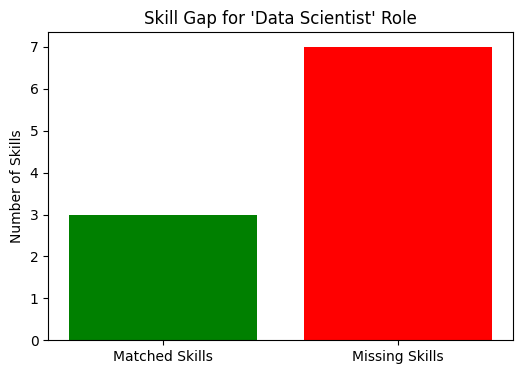


 Matched Skills (3): ['Deep Learning', 'Python', 'SQL']
 Missing Skills (7): ['Data Visualization', 'Matplotlib', 'NumPy', 'Pandas', 'Scikit-Learn', 'Statistics', 'TensorFlow']


In [163]:
user_skills = "Python, SQL, Deep Learning"
predicted_title = "Data Scientist"

visualize_skill_gap(user_skills, predicted_title, job_roles_skills)


In [164]:
import joblib

# Save model & encoders
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(edu_encoder, "edu_encoder.pkl")
joblib.dump(loc_encoder, "loc_encoder.pkl")


['loc_encoder.pkl']